#Importing libraries

In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [8]:
#Connect to drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading Model

In [9]:
cnn = tf.keras.models.load_model("/content/trained_model.h5")

## Visualization and Performing Prediction on single image


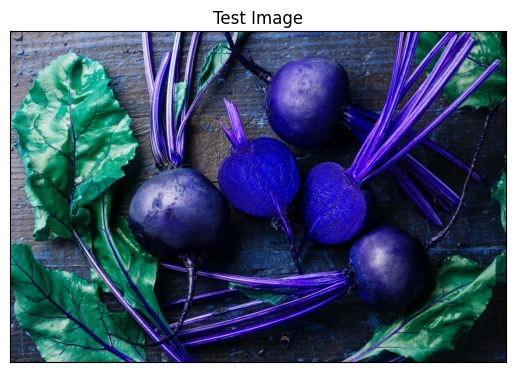

In [27]:
import cv2
image_path = "/content/drive/MyDrive/Fruit_vegetable_Recognoition/test/beetroot/Image_1.jpg"
img = cv2.imread(image_path)
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [28]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(64, 64))
input_arr= tf.keras.preprocessing.image.img_to_array(image)
input_arr= np.array([input_arr]) # converting single image to batch
predicitions = cnn.predict(input_arr)


1/1 [==============================] - 0s 37ms/step


In [30]:
print(predicitions[0])
print(max(predicitions[0]))

[4.81660995e-24 0.00000000e+00 1.00000000e+00 7.68765210e-23
 0.00000000e+00 1.12764127e-31 1.28963137e-30 0.00000000e+00
 1.25212656e-20 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.60749813e-28 0.00000000e+00 1.56925497e-35
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.93166213e-33
 1.55269390e-29 3.47381865e-30 6.09433950e-25 0.00000000e+00
 0.00000000e+00 1.23551516e-35 1.35364032e-26 3.35595309e-29
 1.48351419e-36 1.75280701e-37 0.00000000e+00 0.00000000e+00
 2.12965468e-35 2.10795835e-30 0.00000000e+00 2.55295241e-33]
1.0


In [31]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_vegetable_Recognoition/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [32]:
test_set.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [33]:
result_index = np.where(predicitions[0] == max(predicitions[0]))
print(result_index[0][0])

2


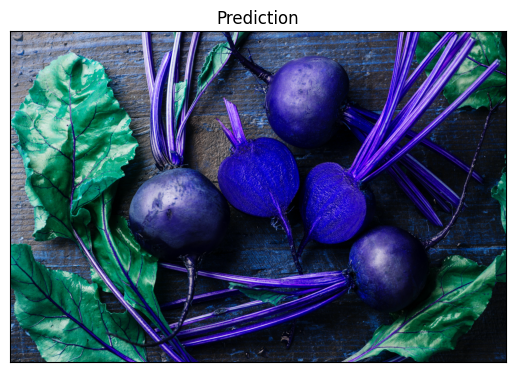

In [34]:
#Display Image
plt.imshow(img)
plt.title("Prediction")
plt.xticks([])
plt.yticks([])
plt.show()

In [35]:
#Single Prediiction
print ("It's a {}".format(test_set.class_names[result_index[0][0]]))

It's a beetroot
